# 평가 지표
## 분류모델 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC Curve, AUC score

## 회귀모델 평가 지표
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

# TODO 머신 모델을 이용해 학습
- 데이터는 `MNIST` 데이터셋 사용 위에서 분리한 X,y 값
    - `y = np.where(y==9, 1, 0)`
- DecisionTreeClassifier 사용 (max_depth=3, random_state=0)
    - 변수 `tree`에 할당
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3, random_state=0)
    - 변수 `rfc`에 할당
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             recall_score, 
                             accuracy_score, 
                             precision_score, 
                             f1_score)

In [2]:
# 데이터 로드 및 분리
from sklearn.datasets import load_digits
mnist = load_digits()

X, y = mnist['data'], mnist['target']

# 9 값을 찾는 문제로, 9가 아닌 나머지를 0으로, 9를 1로 바꿔
# 이진 분류 문제로 변환
y = np.where(y==9, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.25, 
                                                    random_state=0
                                                   )
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [3]:
# 모델생성
tree= DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

In [4]:
# 모델학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [6]:
# 검증
## 추론
pred_train_tree= tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rfc= rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

In [8]:
# 평가 - DecisionTree
print("DT Train set")
print("정확도 Accuracy : ", accuracy_score(y_train, pred_train_tree))
print("재현율 Recall : ", recall_score(y_train, pred_train_tree))
print("정밀도 Precision : ", precision_score(y_train, pred_train_tree))
print("F-1 Score : ", f1_score(y_train, pred_train_tree))

print("\nDT Test set")
print("정확도 Accuracy : ", accuracy_score(y_test, pred_test_tree))
print("재현율 Recall : ", recall_score(y_test, pred_test_tree))
print("정밀도 Precision : ", precision_score(y_test, pred_test_tree))
print("F-1 Score : ", f1_score(y_test, pred_test_tree))

DT Train set
정확도 Accuracy :  0.9465478841870824
재현율 Recall :  0.8
정밀도 Precision :  0.7058823529411765
F-1 Score :  0.7500000000000001

DT Test set
정확도 Accuracy :  0.9511111111111111
재현율 Recall :  0.7555555555555555
정밀도 Precision :  0.7555555555555555
F-1 Score :  0.7555555555555555


In [9]:
# 평가 - RandomForest
print("RFC Train set")
print("정확도 Accuracy : ", accuracy_score(y_train, pred_train_rfc))
print("재현율 Recall : ", recall_score(y_train, pred_train_rfc))
print("정밀도 Precision : ", precision_score(y_train, pred_train_rfc))
print("F-1 Score : ", f1_score(y_train, pred_train_rfc))

print("\nRFC Test set")
print("정확도 Accuracy : ", accuracy_score(y_test, pred_test_rfc))
print("재현율 Recall : ", recall_score(y_test, pred_test_rfc))
print("정밀도 Precision : ", precision_score(y_test, pred_test_rfc))
print("F-1 Score : ", f1_score(y_test, pred_test_rfc))

RFC Train set
정확도 Accuracy :  0.9346696362286563
재현율 Recall :  0.34814814814814815
정밀도 Precision :  1.0
F-1 Score :  0.5164835164835165

RFC Test set
정확도 Accuracy :  0.9311111111111111
재현율 Recall :  0.3111111111111111
정밀도 Precision :  1.0
F-1 Score :  0.4745762711864407


In [11]:
# Confusion matrix

result_cm_tree1 = confusion_matrix(y_train, pred_train_tree)
result_cm_tree2 = confusion_matrix(y_test, pred_test_tree)

result_cm_rfc1 = confusion_matrix(y_train, pred_train_rfc)
result_cm_rfc2 = confusion_matrix(y_test, pred_test_rfc)

- Figure를 그리는데 지금부턴 `my_func.py` 를 만들어서 %%writefile 후 `import`하고
함수로 사용하겠습니다.
<br>`%load`를 통해 작성한 파일을 가져오도록 하겠습니다.

## `%%writefile 파일명.py` : 
- 해당 셀의 내용을 ".py" 파일로 저장


## `%load 파일명.py` : 
- 해당 셀에 "파일명.py"의 내용을 옮긴다.

- 밑에서 사용될 평가 지표들도 포함해서 작성하겠습니다.

In [12]:
%%writefile my_func.py

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score,
                             average_precision_score,
                             PrecisionRecallDisplay,
                             precision_recall_curve,
                             roc_auc_score,
                             RocCurveDisplay,
                             roc_curve,
)

### 함수들 안에 Docstring을 작성하여 사용하는데 가이드 라인을 추가하였습니다.

# confusion matrix 시각화
def plot_confusion_matrix(y, pred, title=None):
    """
    confusion matrix 시각화
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        title: str - 그래프의 제목
    """
    cm = confusion_matrix(y,pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Greys")
    
    if title :
        plt.title(title)
    plt.show()
    
    
    
def plot_roc_curve(y, pos_proba, estimator_name, title=None):
    """
    ROC Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    auc_score = roc_auc_score(y, pos_proba)
    fpr, tpr, _ = roc_curve(y, pos_proba)
    RocCurveDisplay(fpr = fpr , tpr=tpr, roc_auc = auc_score,  estimator_name= estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    

    
def plot_precision_recall_curve(y, pos_proba, estimator_name, title=None):
    """
    Precision Recall Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    ap_score = average_precision_score(y,pos_proba)
    precision, recall, _ = precision_recall_curve(y, pos_proba)
    PrecisionRecallDisplay(precision, recall, average_precision=ap_score, 
                           estimator_name=estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    
    
    

def print_metrics_classification(y, pred, pos_proba=None, title = None):
    """
    분류 결과에 대한 평가지표를 출력하는 함수.
    출력 내용 : accuracy, recall, precision, f1 score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률, 
                                                default: None -ap score, auc score는 출력안한다.
        title: str - 그래프의 제목
    """
    if title:
        print(f"================={title}=================")
    print("정확도 Accuracy : ", accuracy_score(y, pred))
    print("재현율 Recall : ", recall_score(y, pred))
    print("정밀도 Precision : ", precision_score(y, pred))
    print("F-1 Score : ", f1_score(y, pred))
    
    if pos_proba is not None:
        print("Average Precision : ", average_precision_score(y,pos_proba))
        print("ROC-AUC : ", roc_auc_score(y,pos_proba))


Writing my_func.py


In [14]:
# %load my_func.py

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score,
                             average_precision_score,
                             PrecisionRecallDisplay,
                             precision_recall_curve,
                             roc_auc_score,
                             RocCurveDisplay,
                             roc_curve,
)

### 함수들 안에 Docstring을 작성하여 사용하는데 가이드 라인을 추가하였습니다.

# confusion matrix 시각화
def plot_confusion_matrix(y, pred, title=None):
    """
    confusion matrix 시각화
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        title: str - 그래프의 제목
    """
    cm = confusion_matrix(y,pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Greys")
    
    if title :
        plt.title(title)
    plt.show()
    
    
    
def plot_roc_curve(y, pos_proba, estimator_name, title=None):
    """
    ROC Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    auc_score = roc_auc_score(y, pos_proba)
    fpr, tpr, _ = roc_curve(y, pos_proba)
    RocCurveDisplay(fpr = fpr , tpr=tpr, roc_auc = auc_score,  estimator_name= estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    

    
def plot_precision_recall_curve(y, pos_proba, estimator_name, title=None):
    """
    Precision Recall Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    ap_score = average_precision_score(y,pos_proba)
    precision, recall, _ = precision_recall_curve(y, pos_proba)
    PrecisionRecallDisplay(precision, recall, average_precision=ap_score, 
                           estimator_name=estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    
    
    

def print_metrics_classification(y, pred, pos_proba=None, title = None):
    """
    분류 결과에 대한 평가지표를 출력하는 함수.
    출력 내용 : accuracy, recall, precision, f1 score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률, 
                                                default: None -ap score, auc score는 출력안한다.
        title: str - 그래프의 제목
    """
    if title:
        print(f"================={title}=================")
    print("정확도 Accuracy : ", accuracy_score(y, pred))
    print("재현율 Recall : ", recall_score(y, pred))
    print("정밀도 Precision : ", precision_score(y, pred))
    print("F-1 Score : ", f1_score(y, pred))
    
    if pos_proba is not None:
        print("Average Precision : ", average_precision_score(y,pos_proba))
        print("ROC-AUC : ", roc_auc_score(y,pos_proba))


In [16]:
import my_func

In [18]:
help(my_func.plot_confusion_matrix)

Help on function plot_confusion_matrix in module my_func:

plot_confusion_matrix(y, pred, title=None)
    confusion matrix 시각화
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        title: str - 그래프의 제목



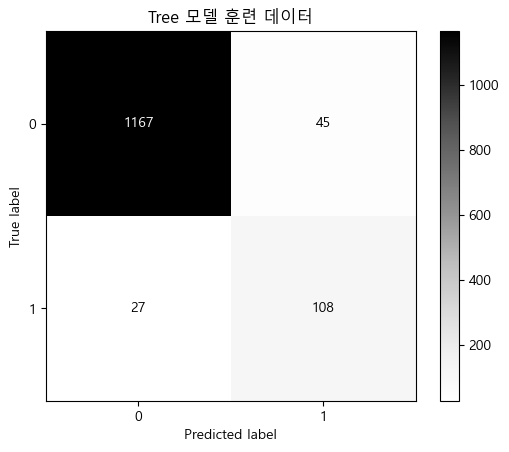

In [20]:
my_func.plot_confusion_matrix(y_train,pred_train_tree, "Tree 모델 훈련 데이터")

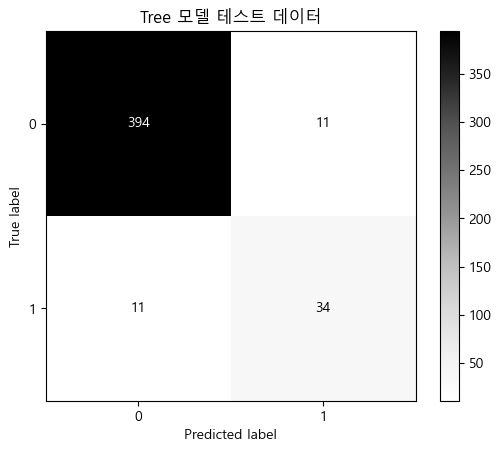

In [21]:
my_func.plot_confusion_matrix(y_test,pred_test_tree, "Tree 모델 테스트 데이터")

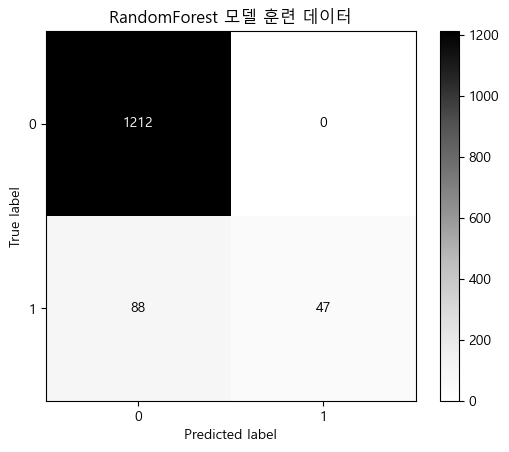

In [44]:
my_func.plot_confusion_matrix(y_train,pred_train_rfc, "RandomForest 모델 훈련 데이터")

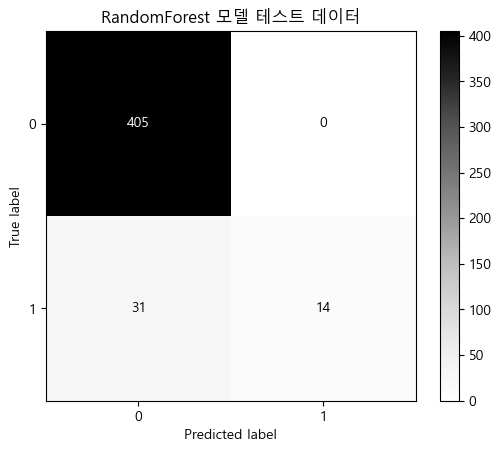

In [23]:
my_func.plot_confusion_matrix(y_test, pred_test_rfc, "RandomForest 모델 테스트 데이터")

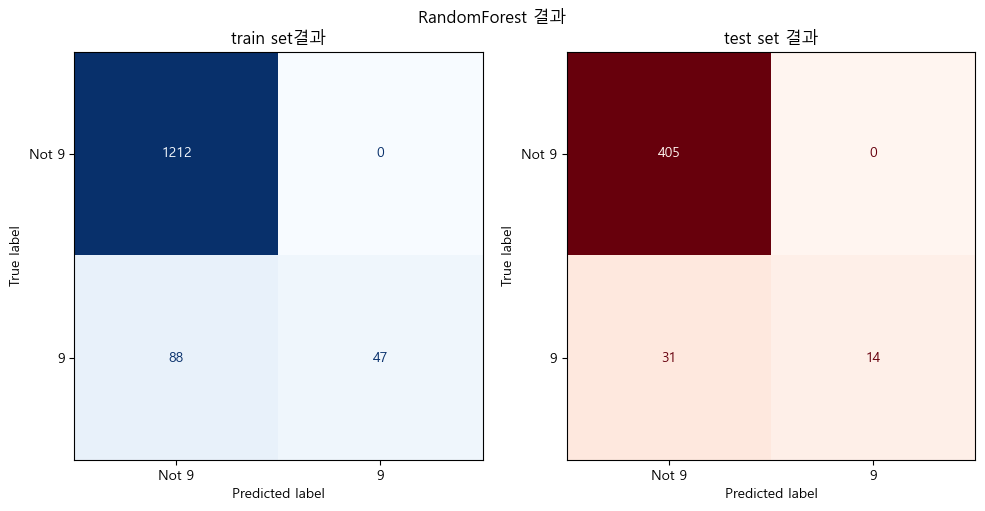

In [46]:
# RFC
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_test_rfc = confusion_matrix(y_test, pred_test_rfc)


fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

disp_train = ConfusionMatrixDisplay(cm_train_rfc, display_labels=['Not 9', "9"])
disp_test = ConfusionMatrixDisplay(cm_test_rfc, display_labels=['Not 9', '9'])

disp_train.plot(cmap="Blues", ax=ax1, colorbar=False)
disp_test.plot(cmap="Reds", ax=ax2, colorbar=False)

ax1.set_title("train set결과")
ax2.set_title("test set 결과")
fig.suptitle("RandomForest 결과")
plt.tight_layout()
plt.show()

### 한 figure 에 axes로 구분하여 동시 표현한 결과

In [48]:
from sklearn.metrics import classification_report
result = classification_report(y_train, pred_train_tree)
# print(type(result))
print(result)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



In [49]:
result = classification_report(y_test, pred_test_tree)
# print(type(result))
print(result)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       405
           1       0.76      0.76      0.76        45

    accuracy                           0.95       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.95      0.95      0.95       450



In [52]:
result = classification_report(y_test, pred_test_rfc)
# print(type(result))
print(result)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       405
           1       1.00      0.31      0.47        45

    accuracy                           0.93       450
   macro avg       0.96      0.66      0.72       450
weighted avg       0.94      0.93      0.91       450



---

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인
        - random_state=0

In [53]:
# import 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             precision_recall_curve, PrecisionRecallDisplay, average_precision_score,
                             roc_curve, RocCurveDisplay, roc_auc_score)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
# 데이터 로딩
X, y = load_breast_cancer(return_X_y=True)

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   stratify=y, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [55]:
# 모델링
## 모델생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rfc = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

## 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

## 검증
### 추론
pred_test_tree = tree.predict(X_test)
pred_test_rfc = rfc.predict(X_test)

# predict_proba(): 추정 (class별)확률을 반환.
pos_test_tree = tree.predict_proba(X_test)[:, 1]  #양성확률
pos_test_rfc = rfc.predict_proba(X_test)[:, 1]

In [56]:
import my_func
help(my_func.print_metrics_classification)

Help on function print_metrics_classification in module my_func:

print_metrics_classification(y, pred, pos_proba=None, title=None)
    분류 결과에 대한 평가지표를 출력하는 함수.
    출력 내용 : accuracy, recall, precision, f1 score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률, 
                                                default: None -ap score, auc score는 출력안한다.
        title: str - 그래프의 제목



In [62]:
### 평가
my_func.print_metrics_classification(y_test, pred_test_tree, pos_test_tree, "DecisionTree")
print("\n")
my_func.print_metrics_classification(y_test, pred_test_rfc, pos_test_rfc, "RandomForest")

=================DecisionTree=================
정확도 Accuracy :  0.9210526315789473
재현율 Recall :  0.9305555555555556
정밀도 Precision :  0.9436619718309859
F-1 Score :  0.9370629370629372
Average Precision :  0.9508563971094506
ROC-AUC :  0.9446097883597883


=================RandomForest=================
정확도 Accuracy :  0.9385964912280702
재현율 Recall :  0.9444444444444444
정밀도 Precision :  0.9577464788732394
F-1 Score :  0.951048951048951
Average Precision :  0.977122126791544
ROC-AUC :  0.9718915343915344


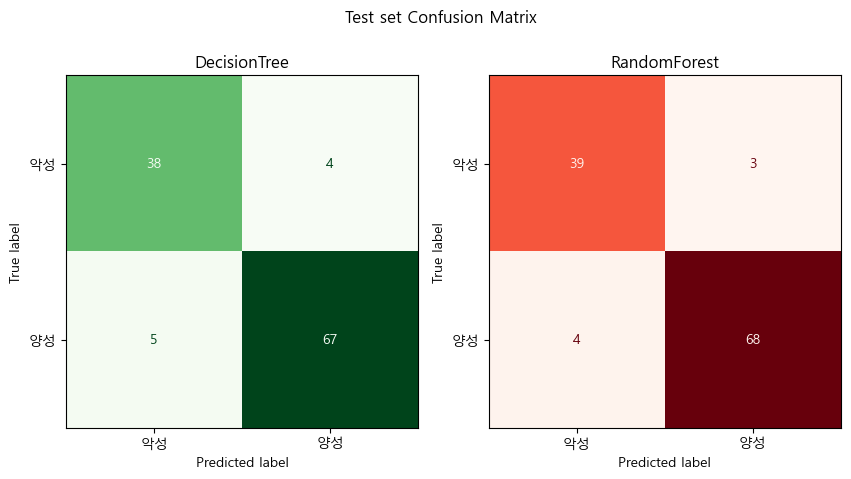

In [65]:
# Confusion Matrix
## 한 figure 에 axes를 통해 DT, RFC 동시 표현
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
cm1 = confusion_matrix(y_test, pred_test_tree)
cm2 = confusion_matrix(y_test, pred_test_rfc)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=['악성', '양성'])
disp2 = ConfusionMatrixDisplay(cm2, display_labels=['악성', '양성'])
disp1.plot(cmap='Greens', ax=ax1, colorbar=False)
disp2.plot(cmap='Reds', ax=ax2, colorbar=False)
ax1.set_title('DecisionTree')
ax2.set_title('RandomForest')
fig.suptitle("Test set Confusion Matrix")
plt.show()

In [66]:
help(my_func)

Help on module my_func:

NAME
    my_func

FUNCTIONS
    plot_confusion_matrix(y, pred, title=None)
        confusion matrix 시각화
        [parameter]
            y: ndarray - 정답
            pred: ndarray - 모델 추정한 label
            title: str - 그래프의 제목
    
    plot_precision_recall_curve(y, pos_proba, estimator_name, title=None)
        Precision Recall Curve 시각화 함수
        [parameter]
            y : ndarray - 정답
            pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
            estimator_name : str - 범례(legend)에 나올 모델의 이름.
            title : str - subplot의 제목
    
    plot_roc_curve(y, pos_proba, estimator_name, title=None)
        ROC Curve 시각화 함수
        [parameter]
            y : ndarray - 정답
            pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
            estimator_name : str - 범례(legend)에 나올 모델의 이름.
            title : str - subplot의 제목
    
    print_metrics_classification(y, pred, pos_proba=None, title=None)
        분류 결과에 대한 평가지표를 출력하는 함수.
        출력 내용 : accuracy,

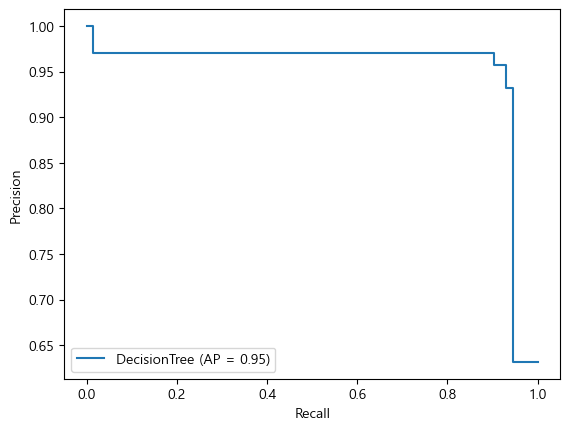

In [67]:
my_func.plot_precision_recall_curve(y_test, pos_test_tree, "DecisionTree")

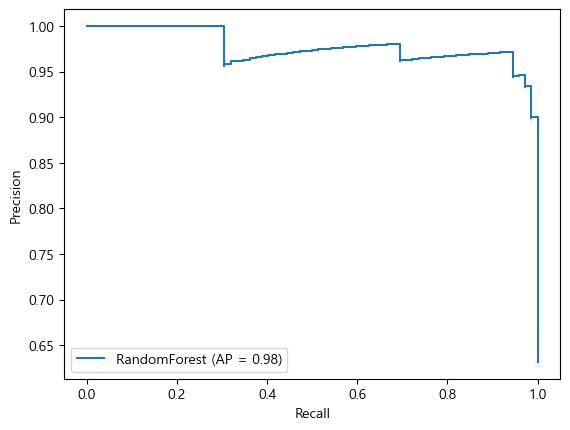

In [69]:
my_func.plot_precision_recall_curve(y_test, pos_test_rfc, "RandomForest")

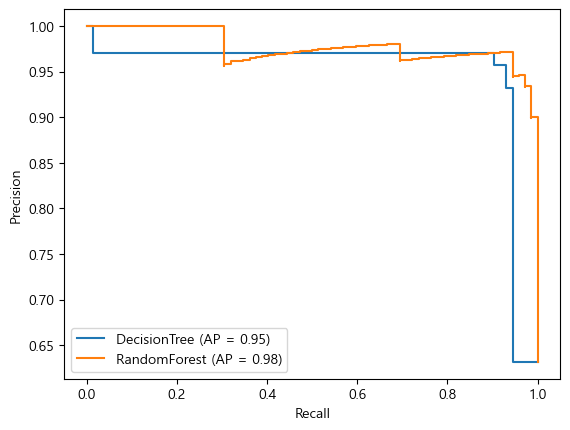

In [71]:
## 두개 한번 plot에 그리기
## 우선 필요한 변수값 만들기 (ap_score)
ap_tree = average_precision_score(y_test, pos_test_tree)  #(정답, 양성의 확률)
ap_rfc = average_precision_score(y_test, pos_test_rfc)

## 시각화
precision1, recall1, _ = precision_recall_curve(y_test, pos_test_tree)
precision2, recall2, _ = precision_recall_curve(y_test, pos_test_rfc)

ax = plt.gca()
PrecisionRecallDisplay(precision1, recall1, average_precision=ap_tree, 
                       estimator_name="DecisionTree").plot(ax=ax)
PrecisionRecallDisplay(precision2, recall2, average_precision=ap_rfc, 
                      estimator_name="RandomForest").plot(ax=ax)
plt.show()

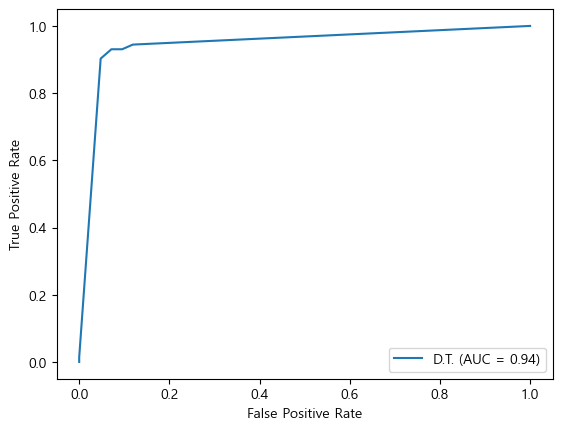

In [72]:
my_func.plot_roc_curve(y_test, pos_test_tree,"D.T.")

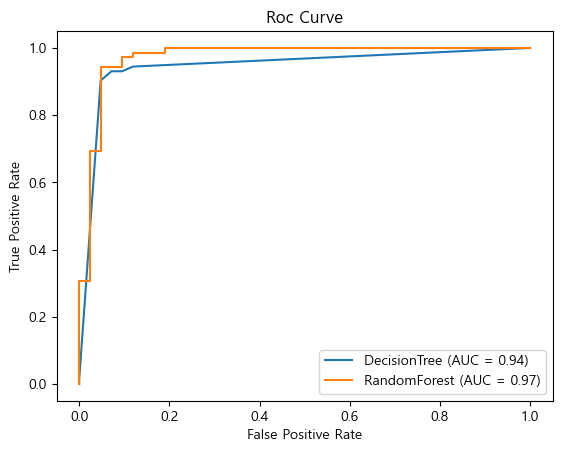

In [73]:
## 두개 한번 plot에 그리기
## 우선 필요한 변수값 만들기 (auc_score)
auc_tree = roc_auc_score(y_test, pos_test_tree) #(정답, 양성확률)
auc_rfc = roc_auc_score(y_test, pos_test_rfc)

fpr1, tpr1, _ = roc_curve(y_test, pos_test_tree)
fpr2, tpr2, _ = roc_curve(y_test, pos_test_rfc)

ax = plt.gca()

RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=auc_tree,
                estimator_name="DecisionTree").plot(ax=ax)
RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=auc_rfc, 
                estimator_name='RandomForest').plot(ax=ax)
plt.title("Roc Curve")
plt.show()

## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

**상관관계** 
- 양수: 양의 상관관계 -> 선형적인 비례 관계
- 음수: 음의 상관관계 -> 선형적인 반비례 관례
- 값의 범위: -1 ~ 1
- 절대값 기준으로 1에 가까울 수록 선형적 상관관계가 강하다. 0에 가까울 수록 관계가 적다.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [76]:
X, y = make_regression(n_samples=1000,  
                       n_features=1,   
                       n_informative=1, # label(y) 에 영향을 주는 feature의 개수.
                                           # n_features와 같거나 작은 정수를 설정.
                       noise=30,        # 모델이 찾을 수 없는 값의 범위. 
                        # 0 ~ 30 사이의 랜덤실수 값을 생성된 y에 더한다.
                           # ==> 인정할 수 있는 오차의 범위.
                       random_state=0
                      )
X.shape, y.shape

((1000, 1), (1000,))

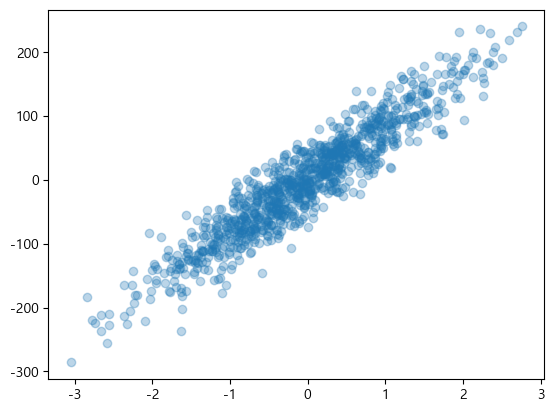

In [77]:
plt.scatter(X, y, alpha=0.3)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((800, 1), (200, 1))

In [80]:
# 모델 생성
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
lr = LinearRegression()

# 학습
tree.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
## 추정
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [84]:
# (정답, 모델추정값)
print('Tree')
print('MSE:', mean_squared_error(y_train, pred_train))
print('RMSE:', mean_squared_error(y_train, pred_train, squared=False))
print("R2:", r2_score(y_train, pred_train))
print('MAE:', mean_absolute_error(y_train, pred_train))
print("========================")
print('MSE:', mean_squared_error(y_test, pred_test))
print('RMSE:', mean_squared_error(y_test, pred_test, squared=False))
print("R2:", r2_score(y_test, pred_test))
print('MAE:', mean_absolute_error(y_test, pred_test))

Tree
MSE: 999.7466989529054
RMSE: 31.61877130681876
R2: 0.8696021326641414
MAE: 25.606478239082954
MSE: 1057.6377039774145
RMSE: 32.521342284374036
R2: 0.8348442822143439
MAE: 26.12205620975511


In [85]:
print("Linear Regression 결과")
print('MSE:', mean_squared_error(y_train, pred_train_lr))
print('RMSE:', mean_squared_error(y_train, pred_train_lr, squared=False))
print("R2:", r2_score(y_train, pred_train_lr))
print('MAE:', mean_absolute_error(y_train, pred_train_lr))
print("========================")
print('MSE:', mean_squared_error(y_test, pred_test_lr))
print('RMSE:', mean_squared_error(y_test, pred_test_lr, squared=False))
print("R2:", r2_score(y_test, pred_test_lr))
print('MAE:', mean_absolute_error(y_test, pred_test_lr))

Linear Regression 결과
MSE: 899.6108311038803
RMSE: 29.993513150411044
R2: 0.8826629445928171
MAE: 23.76770271361007
MSE: 832.1344100029423
RMSE: 28.846740023838784
R2: 0.8700578135014047
MAE: 23.047557435366105


In [86]:
from sklearn.model_selection import cross_val_score, cross_validate
result_tree = cross_val_score(DecisionTreeRegressor(max_depth=3, random_state=0), #모델
                              X_train, # Feature
                              y_train, # label(target)
                              scoring="neg_mean_squared_error", # -MSE
                              cv=5,# fold개수
                              n_jobs=-1
                             )

In [87]:
-result_tree

array([1301.13643155, 1100.2964629 , 1201.44160207, 1293.91190691,
       1020.77921183])

In [90]:
result = cross_validate(LinearRegression(),
                        X_train, 
                        y_train, 
                        scoring=["neg_mean_squared_error", 
                                 "neg_root_mean_squared_error", 
                                 "neg_mean_absolute_error", 
                                 "r2"], 
                        cv=4, 
                        n_jobs=-1
                       
                       )

In [91]:
print(result)

{'fit_time': array([0.        , 0.00099707, 0.        , 0.00198507]), 'score_time': array([0.        , 0.00099707, 0.        , 0.00200915]), 'test_neg_mean_squared_error': array([-946.94718354, -892.50273816, -978.47248532, -790.33004046]), 'test_neg_root_mean_squared_error': array([-30.77250694, -29.87478432, -31.28054484, -28.11280919]), 'test_neg_mean_absolute_error': array([-24.13048709, -23.5393807 , -25.15972666, -22.33538873]), 'test_r2': array([0.86952396, 0.89007099, 0.86264642, 0.90268011])}


In [92]:
result['test_r2'].mean()

0.8812303692377997

In [93]:
### LinearRegression 추정결과를 시각화.
new_x = np.linspace(-3, 3, 1000)
new_y = lr.predict(new_x.reshape(-1, 1)) #LinearRegression 추론값
new_y2 = tree.predict(new_x.reshape(-1, 1)) #D.T. 추론값

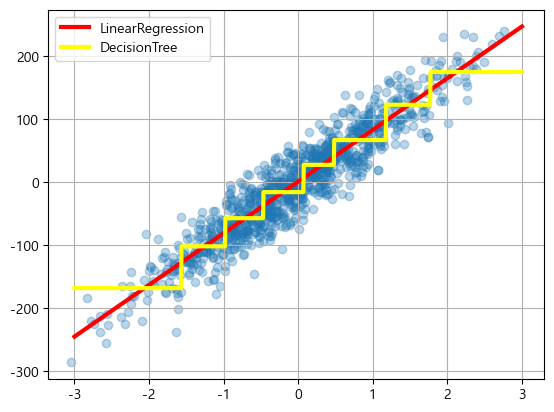

In [94]:
plt.scatter(X, y, alpha=0.3)
plt.plot(new_x, new_y, color='red', linewidth=3, label="LinearRegression")
plt.plot(new_x, new_y2, color='yellow', linewidth=3, label="DecisionTree")
plt.legend()
plt.grid(True)
plt.show()

---

# Overfitting, Underfitting, Generalization

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def tree_modeling(X, y, max_depth=None):
    # 전달받은 train set(X,y)과 max_depth를 이용해 DecisionTree 모델을 생성, 학습 후 반환
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X, y)    
    return tree

def tree_accuracy(X, y, model, title):
    pred = model.predict(X)
    print(title, accuracy_score(y, pred)) # 정확도 출력
    

In [102]:
for i in range(1,6):
    tree = tree_modeling(X_train, y_train, i)
    print(f"max_depth: {i}")
    tree_accuracy(X_train, y_train, tree, "Train set:")
    tree_accuracy(X_test, y_test, tree, "Test set:")
    print()

max_depth: 1
Train set: 0.9295774647887324
Test set: 0.8881118881118881

max_depth: 2
Train set: 0.931924882629108
Test set: 0.8881118881118881

max_depth: 3
Train set: 0.9765258215962441
Test set: 0.916083916083916

max_depth: 4
Train set: 0.9859154929577465
Test set: 0.9090909090909091

max_depth: 5
Train set: 1.0
Test set: 0.9020979020979021



max_depth가 1부터 시작해서 5까지 오면서 `train set` 의 정확도는 점점 좋아지면서 5에서 1.0을 찍었습니다.
<br>=> max_depth가 커지면서 점점 **모델이 복잡**해지고, 이를 통해 **Train set에 대한 모델의 성능이 좋아졌습니다.**
<br>점점 **`"과대적합" (Overfitting)`** 이 일어나고 있습니다.

반면, Test set에 대한 모델의 성능의 경우 점점 좋아지다 3에서 5로 max_depth가 변한 순간 성능이 떨어졌습니다.
<br>max_depth의 여러 경우를 봤다고 할 수 없고, 단순히 Test set에 대한 모델의 정확도가 
<br>큰 차이를 가지고 있다고 할 수 없지만 Train set, Test set에 대한 각각의 모델 성능 정확도의 차이가
<br>가장 작은  `max_depth=3` 이 좋다고 볼 수 있습니다.

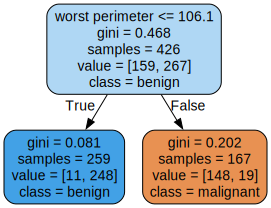

In [103]:
# graphviz를 이용해 시각화(추론 과정)
from sklearn.tree import export_graphviz
from graphviz import Source

src = export_graphviz(tree_1, # 모델
                      feature_names=data['feature_names'],
                      class_names=data['target_names'], 
                      rounded=True, 
                      filled=True
                     )
graph = Source(src)
graph

In [104]:
max_depth_candidate = [1, 2, 3, 4, 5, None] 

# 검증 결과를 담을 리스트
train_acc_list = []
test_acc_list = []

for max_depth in max_depth_candidate:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [105]:
import pandas as pd

result_df = pd.DataFrame({
    
            "train":train_acc_list, 
            "test":test_acc_list
}, 
            index=max_depth_candidate
)
result_df

,train,test
1.0,0.929577,0.888112
2.0,0.931925,0.888112
3.0,0.976526,0.916084
4.0,0.985915,0.909091
5.0,1.000000,0.902098
NaN,1.000000,0.902098


<Axes: >

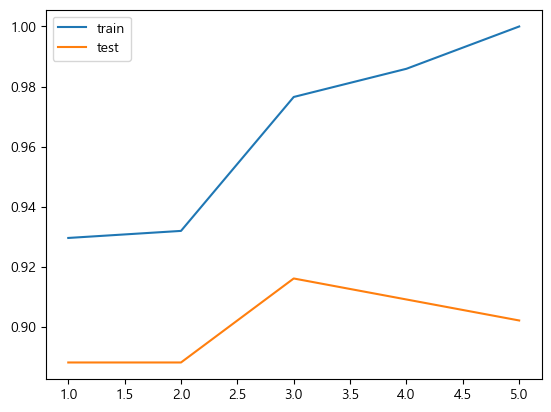

In [106]:
result_df.plot()